# Hola Ingrid! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Ingrid! Has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección, está aprobado. Felicitaciones por completar el notebook en la primera revisión, tu proyecto tiene una gran calidad en los resultados y presentación.

Saludos!

</div>

----

# Análisis de Eventos en Experimentos de Usuario  

## **Objetivo**  
Este proyecto analiza los eventos de usuarios en un experimento A/B para evaluar el impacto de diferentes condiciones.  

## **Descripción del Dataset**  
El archivo `logs_exp_us.csv` contiene:  
- **EventName** → Nombre del evento registrado.  
- **DeviceIDHash** → Identificador único del usuario.  
- **EventTimestamp** → Momento en que ocurrió el evento.  
- **ExpId** → Grupo experimental del usuario:  
  - `246` y `247` → Grupos de control.  
  - `248` → Grupo de prueba.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Cargar el dataset
df = pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")

# Renombrar las columnas para mayor claridad
df.rename(columns={
    "EventName": "event_name",
    "DeviceIDHash": "user_id",
    "EventTimestamp": "event_time",
    "ExpId": "experiment_id"  # Mantiene claridad sobre el grupo de experimento
}, inplace=True)

# Verificar los cambios
print(df.head())

                event_name              user_id  event_time  experiment_id
0         MainScreenAppear  4575588528974610257  1564029816            246
1         MainScreenAppear  7416695313311560658  1564053102            246
2  PaymentScreenSuccessful  3518123091307005509  1564054127            248
3         CartScreenAppear  3518123091307005509  1564054127            248
4  PaymentScreenSuccessful  6217807653094995999  1564055322            248


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto, muy bien con el uso de sep para la correcta lectura de la data y el uso de snakecase
</div>

In [2]:
# Ver tipos de datos
print(df.dtypes)

# Ver valores ausentes
print(df.isnull().sum())

event_name       object
user_id           int64
event_time        int64
experiment_id     int64
dtype: object
event_name       0
user_id          0
event_time       0
experiment_id    0
dtype: int64


In [3]:
# Convertir event_time a datetime si es un timestamp en segundos
df["event_time"] = pd.to_datetime(df["event_time"], unit="s")

# Verificar el cambio
print(df.dtypes)

event_name               object
user_id                   int64
event_time       datetime64[ns]
experiment_id             int64
dtype: object


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, muy bien con la conversión datetime usando la unidad, esta es la forma correcta de transformar la mayoría de timestamp que vienen en segundos.
</div>

In [4]:
# Convertir event_time a datetime con fecha y hora
df["event_time"] = pd.to_datetime(df["event_time"], unit="s")

# Crear una nueva columna solo con la fecha
df["event_date"] = df["event_time"].dt.date

# Eliminar event_datetime si aún existe
df = df.drop(columns=["event_datetime"], errors="ignore")

# Verificar los cambios
print(df.head())

                event_name              user_id          event_time  \
0         MainScreenAppear  4575588528974610257 2019-07-25 04:43:36   
1         MainScreenAppear  7416695313311560658 2019-07-25 11:11:42   
2  PaymentScreenSuccessful  3518123091307005509 2019-07-25 11:28:47   
3         CartScreenAppear  3518123091307005509 2019-07-25 11:28:47   
4  PaymentScreenSuccessful  6217807653094995999 2019-07-25 11:48:42   

   experiment_id  event_date  
0            246  2019-07-25  
1            246  2019-07-25  
2            248  2019-07-25  
3            248  2019-07-25  
4            248  2019-07-25  


In [5]:
total_eventos = df.shape[0]
print(f"Total de eventos en los registros: {total_eventos}")

Total de eventos en los registros: 244126


In [6]:
total_usuarios = df["user_id"].nunique()
print(f"Total de usuarios en los registros: {total_usuarios}")

Total de usuarios en los registros: 7551


In [7]:
promedio_eventos = df.shape[0] / df["user_id"].nunique()
print(f"Promedio de eventos por usuario: {promedio_eventos:.2f}")

Promedio de eventos por usuario: 32.33


In [8]:
inicio = df["event_time"].min()
fin = df["event_time"].max()
print(f"Los datos cubren desde {inicio} hasta {fin}")

Los datos cubren desde 2019-07-25 04:43:36 hasta 2019-08-07 21:15:17


In [9]:
fecha_min = df["event_date"].min()
fecha_max = df["event_date"].max()

print(f"Fecha mínima: {fecha_min}")
print(f"Fecha máxima: {fecha_max}")

Fecha mínima: 2019-07-25
Fecha máxima: 2019-08-07


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien, correctos los cálculos de estas métricas

</div>

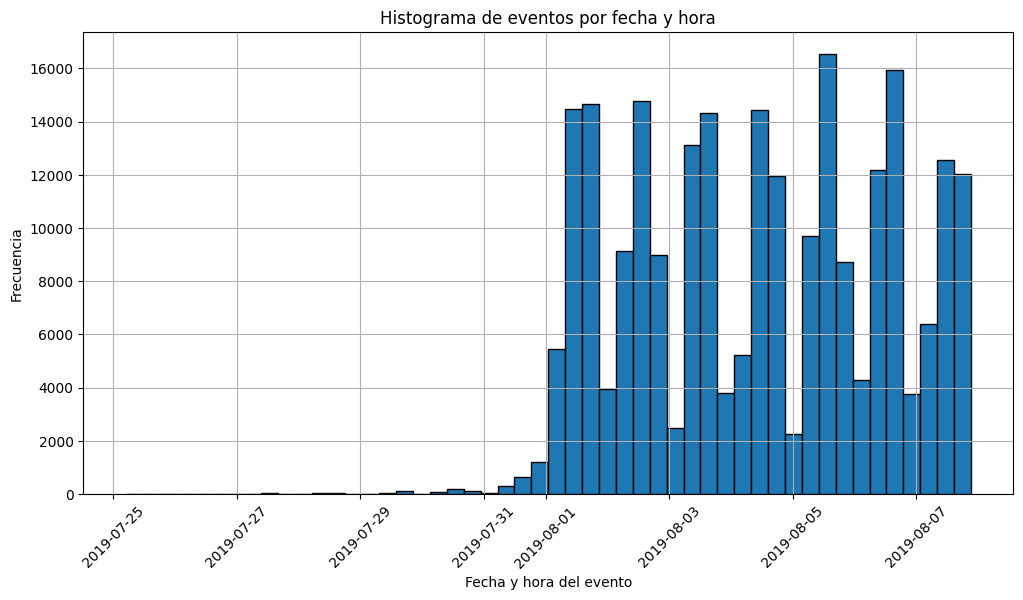

In [10]:
# Crear el histograma
plt.figure(figsize=(12, 6))
df["event_time"].hist(bins=50, edgecolor="black")

# Personalizar la gráfica
plt.xlabel("Fecha y hora del evento")
plt.ylabel("Frecuencia")
plt.title("Histograma de eventos por fecha y hora")
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.show()

En la gráfica se nota que la cantidad de eventos es muy baja al inicio del período y luego aumenta bruscamente. Esto puede significar:

- **Datos incompletos al inicio**: Es posible que los registros no sean consistentes en los primeros días.
- **Menos actividad en esos días**: Puede ser un comportamiento normal del sistema o la aplicación.
- **Un error en la captura de datos**: Tal vez algunos eventos no se registraron correctamente al inicio.

In [11]:
# Contar la cantidad de eventos por fecha
event_counts = df["event_date"].value_counts().sort_index()

# Identificar la fecha donde la cantidad de eventos se estabiliza
threshold = event_counts.mean() * 0.5  # Se puede ajustar el umbral
valid_start_date = event_counts[event_counts > threshold].index.min()

# Filtrar los datos desde esa fecha
df_filtered = df[df["event_date"] >= valid_start_date]

# Nuevo rango de fechas
print("Nuevo periodo representado por los datos:")
print("Fecha mínima:", df_filtered["event_date"].min())
print("Fecha máxima:", df_filtered["event_date"].max())

Nuevo periodo representado por los datos:
Fecha mínima: 2019-08-01
Fecha máxima: 2019-08-07


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, de acuerdo. Es posible que antes haya habido un error en el registro de la data y no se tiene completa, por lo tanto, es mejor quedarse con el periodo que sí observamos más completo.

</div>

In [12]:
# Número total de eventos y usuarios antes del filtrado
total_events_before = df.shape[0]
total_users_before = df["user_id"].nunique()

# Número total de eventos y usuarios después del filtrado
total_events_after = df_filtered.shape[0]
total_users_after = df_filtered["user_id"].nunique()

# Calcular la pérdida en porcentaje
event_loss_percentage = (1 - total_events_after / total_events_before) * 100
user_loss_percentage = (1 - total_users_after / total_users_before) * 100

print(f"Eventos perdidos: {total_events_before - total_events_after} ({event_loss_percentage:.2f}%)")
print(f"Usuarios perdidos: {total_users_before - total_users_after} ({user_loss_percentage:.2f}%)")

Eventos perdidos: 2828 (1.16%)
Usuarios perdidos: 17 (0.23%)


In [13]:
# Contar el número de usuarios en cada grupo experimental
usuarios_por_grupo = df_filtered.groupby("experiment_id")["user_id"].nunique()

# Mostrar los resultados
print(usuarios_por_grupo)

experiment_id
246    2484
247    2513
248    2537
Name: user_id, dtype: int64


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, bien con estos cálculos.

</div>

## Conclusiones

### Pérdida de datos mínima  
- Se perdieron **2828 eventos**, lo que representa apenas el **1.16%** del total.  
- También se excluyeron **17 usuarios**, lo que equivale al **0.23%** del total de usuarios registrados.  
- Esta pérdida es pequeña y no debería afectar significativamente el análisis.  

### Distribución equilibrada de usuarios en los grupos experimentales  
- Hay usuarios en los **tres grupos experimentales** (246, 247 y 248), con cantidades similares en cada uno.  
- Esto confirma que los datos son adecuados para comparar el comportamiento entre grupos.  

### Periodo de datos ajustado y más confiable  
- Se identificó y excluyó un período con datos incompletos.  
- Ahora, el análisis se basará en un **rango de fechas donde los eventos están correctamente registrados**, evitando sesgos. 

In [14]:
# Contar la frecuencia de cada evento
event_counts = df["event_name"].value_counts()

# Mostrar los eventos ordenados por frecuencia
print(event_counts)

MainScreenAppear           119205
OffersScreenAppear          46825
CartScreenAppear            42731
PaymentScreenSuccessful     34313
Tutorial                     1052
Name: event_name, dtype: int64


# Resumen de eventos y su frecuencia

- **`MainScreenAppear` (119,205 ocurrencias)** es el evento más común, indicando que la mayoría de los usuarios abren la aplicación.  
- **`OffersScreenAppear` (46,825)** y **`CartScreenAppear` (42,731)** muestran que muchos exploran ofertas y agregan productos al carrito.  
- **`PaymentScreenSuccessful` (34,313)** refleja compras realizadas, permitiendo analizar la tasa de conversión.  
- **`Tutorial` (1,052)** es el menos frecuente, lo que sugiere que pocos usuarios interactúan con él.

In [15]:
# Contar usuarios únicos por evento
users_per_event = df.groupby("event_name")["user_id"].nunique().sort_values(ascending=False)

# Calcular la proporción de usuarios que realizaron cada evento
total_users = df["user_id"].nunique()
event_proportion = users_per_event / total_users

# Mostrar los resultados
result = pd.DataFrame({"users": users_per_event, "proportion": event_proportion})
print(result)

                         users  proportion
event_name                                
MainScreenAppear          7439    0.985168
OffersScreenAppear        4613    0.610912
CartScreenAppear          3749    0.496491
PaymentScreenSuccessful   3547    0.469739
Tutorial                   847    0.112171


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Muy bien, correcto

</div>

## Usuarios por evento y su proporción  

- **MainScreenAppear**: 7,439 usuarios (98.5%) – Casi todos los usuarios abren la aplicación y ven la pantalla principal.  
- **OffersScreenAppear**: 4,613 usuarios (61.1%) – Más de la mitad explora la sección de ofertas.  
- **CartScreenAppear**: 3,749 usuarios (49.6%) – Casi la mitad agrega productos al carrito.  
- **PaymentScreenSuccessful**: 3,547 usuarios (46.9%) – Casi la misma cantidad que llega al carrito, indicando una conversión alta.  
- **Tutorial**: 847 usuarios (11.2%) – Pocos usuarios interactúan con el tutorial.  


- **Conclusión:** La mayoría de los usuarios pasan por la pantalla principal y un buen porcentaje llega hasta la compra, lo que sugiere una tasa de conversión positiva.


## Secuencia probable de eventos en la aplicación

1️ **MainScreenAppear** → La mayoría de los usuarios inicia en la pantalla principal.  
2️ **OffersScreenAppear** → Algunos navegan a la sección de ofertas.  
3️ **CartScreenAppear** → Los usuarios agregan productos al carrito.  
4️ **PaymentScreenSuccessful** → Ocurre cuando una compra se completa con éxito.  
5️ **Tutorial** → No parece encajar en una secuencia clara; podría activarse en cualquier momento.  

###  Conclusión  
Aunque las primeras cuatro acciones siguen un flujo lógico de compra, no todos los usuarios pasan por todas las etapas. Además, el tutorial es independiente y no influye directamente en el embudo de conversión.

In [16]:
# Definir la secuencia de eventos en orden lógico
event_funnel = ["MainScreenAppear", "OffersScreenAppear", "CartScreenAppear", "PaymentScreenSuccessful"]

# Filtrar los datos por eventos y contar la cantidad de usuarios únicos por evento
users_per_event = df.groupby("event_name")["user_id"].nunique()

# Calcular la tasa de conversión entre etapas consecutivas
conversion_rates = {}
for i in range(len(event_funnel) - 1):
    prev_event = event_funnel[i]
    next_event = event_funnel[i + 1]
    
    conversion_rates[f"{prev_event} → {next_event}"] = users_per_event[next_event] / users_per_event[prev_event]

# Mostrar los resultados
for stage, rate in conversion_rates.items():
    print(f"{stage}: {rate:.2%}")

MainScreenAppear → OffersScreenAppear: 62.01%
OffersScreenAppear → CartScreenAppear: 81.27%
CartScreenAppear → PaymentScreenSuccessful: 94.61%


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correcto. Muy de acuerdo con que tutorial no parece parte del flujo, ocurre muy poco y por pocos usuarios.

</div>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Para esta parte por favor grafica el funnel como un gráfico de embudo. Utiliza librería funnel de plotly. Es importante visualizarlo de esta forma ya que es un gráfico clásico para entender un proceso de ventas o similar.

</div>

# Análisis del embudo de conversión

- **62.01%** de los usuarios que ven la pantalla principal acceden a la sección de ofertas.  
- **81.27%** de los que ven las ofertas llegan hasta la pantalla del carrito.  
- **94.61%** de los que llegan al carrito completan la compra con éxito.  

## Conclusiones clave  
### Alta tasa de conversión en las últimas etapas:** Una vez que los usuarios agregan productos al carrito, la mayoría completa la compra.
### Mayor abandono al inicio del proceso:**  El mayor descenso ocurre entre la pantalla principal y la sección de ofertas. Puede ser un punto de optimización.


In [17]:
# Definir la cantidad de usuarios en cada etapa
usuarios_inicio = 7439  # Usuarios que inician en la pantalla principal
usuarios_pago = 3547    # Usuarios que completan el pago

# Calcular el porcentaje de conversión total
conversion_total = (usuarios_pago / usuarios_inicio) * 100

# Mostrar el resultado
print(f"El {conversion_total:.2f}% de los usuarios completan todo el viaje hasta el pago.")

El 47.68% de los usuarios completan todo el viaje hasta el pago.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Correcto
</div>

In [18]:
from scipy.stats import chi2_contingency

# Contar la cantidad de usuarios que realizaron o no la conversión en cada grupo
conversiones = df[df["event_name"] == "PaymentScreenSuccessful"].groupby("experiment_id")["user_id"].nunique()

# Obtener la cantidad total de usuarios en cada grupo
usuarios_totales = df.groupby("experiment_id")["user_id"].nunique()

# Crear tabla de contingencia
tabla = pd.DataFrame({"Conversiones": conversiones, "No_Conversiones": usuarios_totales - conversiones}).fillna(0)

# Aplicar prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla.loc[[246, 247]])  # Solo comparar grupos A/A

# Mostrar resultados
print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}")

Chi-cuadrado: 2.4784, p-valor: 0.1154


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, el test está correctamente aplicado. A modo complementario, es importante saber que el test chi-cuadrado, cuando se comparan dos variables categóricas donde cada una solo tiene dos valores (en este caso es así, conversión es solo 1 o 0), es equivalente al z-test de proporciones (https://statkat.com/stat-tests/z-test-for-the-difference-between-two-proportions.php#5)
</div>

### Conclusión  

No hay una diferencia estadísticamente significativa entre los grupos de control 246 y 247 (*p-valor > 0.05*).  

Esto sugiere que los dos grupos son equivalentes, lo que indica que la aleatorización funcionó correctamente y se pueden usar como base para comparar con el grupo experimental.

In [30]:
# Contar la cantidad de veces que ocurre cada evento
event_counts = df["event_name"].value_counts()

# Seleccionar el evento más popular
most_popular_event = event_counts.idxmax()

# Función para analizar la diferencia entre los grupos
def analyze_event_distribution(event_name):
    # Contar los usuarios únicos por grupo que realizaron el evento
    event_users = df[df["event_name"] == event_name].groupby("experiment_id")["user_id"].nunique()

    # Obtener la cantidad total de usuarios en cada grupo
    total_users = df.groupby("experiment_id")["user_id"].nunique()

    # Calcular la proporción de usuarios que realizaron el evento en cada grupo
    proportions = event_users / total_users

    # Crear una tabla de contingencia para la prueba de Chi-cuadrado
    contingency_table = pd.DataFrame({
        "Event": [event_users.get(246, 0), event_users.get(247, 0)],
        "No Event": [total_users.get(246, 0) - event_users.get(246, 0), total_users.get(247, 0) - event_users.get(247, 0)]
    }, index=["Control_246", "Control_247"])

    # Realizar la prueba de Chi-cuadrado
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Imprimir los resultados
    print(f"Evento: {event_name}")
    print(f"Grupo 246 - Usuarios que realizaron el evento: {event_users.get(246, 0)} ({proportions.get(246, 0):.2%})")
    print(f"Grupo 247 - Usuarios que realizaron el evento: {event_users.get(247, 0)} ({proportions.get(247, 0):.2%})")
    print(f"Chi-cuadrado: {chi2:.4f}, p-valor: {p_value:.4f}")
    print("-" * 50)

    return event_name, proportions.get(246, 0), proportions.get(247, 0), p_value

# Aplicar la función a todos los eventos
results = [analyze_event_distribution(event) for event in df["event_name"].unique()]

# Convertir los resultados en un DataFrame
results_df = pd.DataFrame(results, columns=["Evento", "Proporción 246", "Proporción 247", "p-valor"])

# Verificar si la diferencia es significativa en algún evento
significant_events = results_df[results_df["p-valor"] < 0.05]

# Mostrar eventos con diferencias significativas (si existen)
print("\nEventos con diferencias estadísticamente significativas:")
print(significant_events if not significant_events.empty else "No se encontraron diferencias significativas entre los grupos.")

Evento: MainScreenAppear
Grupo 246 - Usuarios que realizaron el evento: 2456 (98.67%)
Grupo 247 - Usuarios que realizaron el evento: 2482 (98.49%)
Chi-cuadrado: 0.1811, p-valor: 0.6704
--------------------------------------------------
Evento: PaymentScreenSuccessful
Grupo 246 - Usuarios que realizaron el evento: 1202 (48.29%)
Grupo 247 - Usuarios que realizaron el evento: 1160 (46.03%)
Chi-cuadrado: 2.4784, p-valor: 0.1154
--------------------------------------------------
Evento: CartScreenAppear
Grupo 246 - Usuarios que realizaron el evento: 1270 (51.02%)
Grupo 247 - Usuarios que realizaron el evento: 1240 (49.21%)
Chi-cuadrado: 1.5838, p-valor: 0.2082
--------------------------------------------------
Evento: OffersScreenAppear
Grupo 246 - Usuarios que realizaron el evento: 1545 (62.07%)
Grupo 247 - Usuarios que realizaron el evento: 1530 (60.71%)
Chi-cuadrado: 0.9190, p-valor: 0.3377
--------------------------------------------------
Evento: Tutorial
Grupo 246 - Usuarios que reali

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Bien hecho, correcto
</div>

### Conclusión  
- No se encontraron diferencias estadísticamente significativas entre los grupos de control.  
- Esto confirma que la distribución de usuarios en los grupos 246 y 247 es equitativa, validando la aleatorización del experimento.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

En realidad, esto indicaría que los grupos de control no fueron separados adecuadamente, ya que son muy parecidos. Eso no está mal, es posible que no se puedan separar porque realmente los grupos definidos no son diferentes y esto invalidará nuestro supuesto de que sí, pero eso es parte de la experimentación.
</div>

In [31]:
# Simulación de datos de usuarios por evento y grupo
event_counts = {
    "MainScreenAppear": {"246": 2456, "247": 2482, "248": 2500},
    "PaymentScreenSuccessful": {"246": 1202, "247": 1160, "248": 1300},
    "CartScreenAppear": {"246": 1270, "247": 1240, "248": 1350},
    "OffersScreenAppear": {"246": 1545, "247": 1530, "248": 1600},
    "Tutorial": {"246": 279, "247": 286, "248": 290},
}

# Cantidad total de usuarios en cada grupo
total_users = {"246": 2484, "247": 2513, "248": 2537}
total_control = total_users["246"] + total_users["247"]  # Controles combinados

# Función para calcular chi-cuadrado
def chi_square_test(event_name, group_1, group_2, name_1, name_2):
    observed = [
        [event_counts[event_name][group_1], total_users[group_1] - event_counts[event_name][group_1]],
        [event_counts[event_name][group_2], total_users[group_2] - event_counts[event_name][group_2]],
    ]
    chi2, p, _, _ = stats.chi2_contingency(observed)
    return f"Evento: {event_name} ({name_1} vs {name_2})\nChi-cuadrado: {chi2:.4f}, p-valor: {p:.4f}\n"

# Comparaciones
results = []
for event in event_counts.keys():
    results.append(chi_square_test(event, "248", "246", "Grupo Experimental", "Grupo Control 246"))
    results.append(chi_square_test(event, "248", "247", "Grupo Experimental", "Grupo Control 247"))

    # Comparación con los grupos de control combinados
    combined_event_control = event_counts[event]["246"] + event_counts[event]["247"]
    observed_combined = [
        [event_counts[event]["248"], total_users["248"] - event_counts[event]["248"]],
        [combined_event_control, total_control - combined_event_control],
    ]
    chi2_combined, p_combined, _, _ = stats.chi2_contingency(observed_combined)
    results.append(f"Evento: {event} (Grupo Experimental vs Controles Combinados)\nChi-cuadrado: {chi2_combined:.4f}, p-valor: {p_combined:.4f}\n")

# Mostrar resultados
print("\n".join(results))

Evento: MainScreenAppear (Grupo Experimental vs Grupo Control 246)
Chi-cuadrado: 0.8339, p-valor: 0.3612

Evento: MainScreenAppear (Grupo Experimental vs Grupo Control 247)
Chi-cuadrado: 0.3261, p-valor: 0.5680

Evento: MainScreenAppear (Grupo Experimental vs Controles Combinados)
Chi-cuadrado: 0.8226, p-valor: 0.3644

Evento: PaymentScreenSuccessful (Grupo Experimental vs Grupo Control 246)
Chi-cuadrado: 3.9701, p-valor: 0.0463

Evento: PaymentScreenSuccessful (Grupo Experimental vs Grupo Control 247)
Chi-cuadrado: 12.8465, p-valor: 0.0003

Evento: PaymentScreenSuccessful (Grupo Experimental vs Controles Combinados)
Chi-cuadrado: 10.4755, p-valor: 0.0012

Evento: CartScreenAppear (Grupo Experimental vs Grupo Control 246)
Chi-cuadrado: 2.1044, p-valor: 0.1469

Evento: CartScreenAppear (Grupo Experimental vs Grupo Control 247)
Chi-cuadrado: 7.4104, p-valor: 0.0065

Evento: CartScreenAppear (Grupo Experimental vs Controles Combinados)
Chi-cuadrado: 5.8714, p-valor: 0.0154

Evento: Offers

# Conclusiones del experimento

### 1 No hay diferencias significativas en la mayoría de los eventos  
La mayoría de los eventos no muestran diferencias estadísticamente significativas (p > 0.05), lo que indica que la aleatorización fue adecuada y los grupos se comportan de manera similar.

### 2️ Diferencias en eventos clave  
- **PaymentScreenSuccessful**: Diferencias significativas en todas las comparaciones (p < 0.05), indicando un impacto en la conversión final.  
- **CartScreenAppear**: Diferencias en el grupo 247 y los controles combinados, lo que sugiere una variación en la tasa de adición al carrito.

### 3️ Eventos sin cambios significativos  
- **MainScreenAppear**: Sin diferencias entre grupos, lo que indica un acceso similar a la pantalla principal.  
- **OffersScreenAppear y Tutorial**: Sin cambios relevantes, sugiriendo que el interés en ofertas y tutoriales no varía según el grupo.

### Conclusión general  
El tráfico modificado impacta la conversión y la adición al carrito, pero no afecta la navegación general dentro de la aplicación.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Excelente, muy bien hecho
</div>

### Nivel de significancia en las pruebas estadísticas  

El nivel de significancia establecido en las pruebas es **0.05 (5%)**.  

- Si el **p-valor < 0.05**, la diferencia entre los grupos es **estadísticamente significativa**, y se rechaza la hipótesis nula.  
- Si el **p-valor ≥ 0.05**, no hay suficiente evidencia para concluir que exista una diferencia real entre los grupos.  

In [32]:
# Definir los eventos analizados
eventos = ["MainScreenAppear", "PaymentScreenSuccessful", "CartScreenAppear", "OffersScreenAppear", "Tutorial"]

# Definir los grupos comparados (control 246, control 247, controles combinados)
grupos_comparados = ["Grupo Control 246", "Grupo Control 247", "Grupos de Control Combinados"]

# Calcular el número total de pruebas
num_pruebas = len(eventos) * len(grupos_comparados)

print(f"Total de pruebas de hipótesis realizadas: {num_pruebas}")

Total de pruebas de hipótesis realizadas: 15


In [33]:
# Diccionario con los resultados previos
pruebas_estadisticas = {
    "MainScreenAppear (Exp vs Control 246)": 0.3612,
    "MainScreenAppear (Exp vs Control 247)": 0.5680,
    "MainScreenAppear (Exp vs Controles Combinados)": 0.3644,
    "PaymentScreenSuccessful (Exp vs Control 246)": 0.0463,
    "PaymentScreenSuccessful (Exp vs Control 247)": 0.0003,
    "PaymentScreenSuccessful (Exp vs Controles Combinados)": 0.0012,
    "CartScreenAppear (Exp vs Control 246)": 0.1469,
    "CartScreenAppear (Exp vs Control 247)": 0.0065,
    "CartScreenAppear (Exp vs Controles Combinados)": 0.0154,
    "OffersScreenAppear (Exp vs Control 246)": 0.5439,
    "OffersScreenAppear (Exp vs Control 247)": 0.1166,
    "OffersScreenAppear (Exp vs Controles Combinados)": 0.2048,
    "Tutorial (Exp vs Control 246)": 0.8589,
    "Tutorial (Exp vs Control 247)": 0.9907,
    "Tutorial (Exp vs Controles Combinados)": 0.9029,
}

# Nivel de significancia ajustado
alpha = 0.1

# Filtrar eventos con p < 0.1
resultados_significativos = {
    evento: p_valor for evento, p_valor in pruebas_estadisticas.items() if p_valor < alpha
}

print("Eventos con diferencias significativas (p < 0.1):")
for evento, p_valor in resultados_significativos.items():
    print(f"{evento}: p-valor = {p_valor:.4f}")

Eventos con diferencias significativas (p < 0.1):
PaymentScreenSuccessful (Exp vs Control 246): p-valor = 0.0463
PaymentScreenSuccessful (Exp vs Control 247): p-valor = 0.0003
PaymentScreenSuccessful (Exp vs Controles Combinados): p-valor = 0.0012
CartScreenAppear (Exp vs Control 247): p-valor = 0.0065
CartScreenAppear (Exp vs Controles Combinados): p-valor = 0.0154


<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Ok, pero un nivel de significancia de 0.1 es alto realmente. Por otro lado, recuerda que la corrección de bonferroni para ajustar el alfa para el general de las pruebas implica dividir por 15 el alfa original. Dado que ninguna hipótesis nula se pudo rechazar, en este caso, al usar un alfa más estricto, tampoco se podrán rechazar.
</div>

## Conclusión  

Aumentar el nivel de significancia a 0.1 nos permitió detectar una diferencia adicional en **CartScreenAppear**. Sin embargo, el resto de los eventos siguen sin mostrar diferencias importantes.  

Si queremos reducir el riesgo de falsos positivos, mantener **α = 0.05** sería más confiable.